In [7]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import io
from google.colab import files
from google.colab import drive
from matplotlib import pyplot as plt

In [128]:
####
# Uploading the csv file covid.csv (which contains no.of positive and negative samples)
uploaded = files.upload()
state_df = pd.read_csv(io.BytesIO(uploaded['Covid.csv']))
uploaded = files.upload()
country_df = pd.read_csv(io.BytesIO(uploaded['covid_19_india.csv']))
uploaded = files.upload()
vaccine_df = pd.read_csv(io.BytesIO(uploaded['covid_vaccine_statewise.csv']))

Saving Covid.csv to Covid (2).csv


Saving covid_19_india.csv to covid_19_india (3).csv


Saving covid_vaccine_statewise.csv to covid_vaccine_statewise (2).csv


In [133]:
####
# Let's get an understanding of our data
# Let's print a snapshot of our data frames 
# X data frame
state_df.head()


,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [134]:
state_df.tail(3)

,Date,State,TotalSamples,Negative,Positive
15110,2021-07-04,West Bengal,14430084.0,NaN,NaN
15111,2021-07-05,West Bengal,14470472.0,NaN,NaN
15112,2021-07-06,West Bengal,14516751.0,NaN,NaN


In [135]:
####
# Let's look at a quick statistical summary of our data frame
country_df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [137]:
state_df[state_df['State']=='Tamil Nadu'].head()

,Date,State,TotalSamples,Negative,Positive
12492,2020-04-03,Tamil Nadu,3684.0,2789,411.0
12493,2020-04-08,Tamil Nadu,5305.0,4414,690.0
12494,2020-04-09,Tamil Nadu,7267.0,5824,834.0
12495,2020-04-10,Tamil Nadu,8410.0,6838,911.0
12496,2020-04-11,Tamil Nadu,9842.0,7779,969.0


In [138]:
country_df[((country_df['Date']=='2020-03-30')&(country_df['State/UnionTerritory']=='Tamil Nadu'))]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
495,496,2020-03-30,9:30 PM,Tamil Nadu,-,-,4,1,67


In [144]:
df=country_df.copy()


In [146]:
def drop_star(df):
    for i in df['State/UnionTerritory'].iteritems():
        if i[1][-3:] == "***":
            df.drop(i[0],inplace=True)
        
drop_star(df)
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli'], dtype=object)

In [145]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [78]:
#lets convert the Date feature to Date&time datatype
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [79]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df['Discharge_Rate'] = np.round((df['Cured']/df['Confirmed'])*100, decimals = 4)      # create instances for 'death_rate and discharge_rate'
df['Death_Rate'] = np.round((df['Deaths']/df['Confirmed'])*100, decimals = 4)
df.head()

,Sno,Date,Time,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1,0.0,0.0
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1,0.0,0.0
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2,0.0,0.0
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3,0.0,0.0
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3,0.0,0.0


In [80]:
df[df['States']=='Tamil Nadu'].tail()

,Sno,Date,Time,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
16700,16701,2021-07-03,8:00 AM,Tamil Nadu,-,-,2418882,32818,2488407,36707,97.2060,1.3188
16736,16737,2021-07-04,8:00 AM,Tamil Nadu,-,-,2423606,32933,2492420,35881,97.2391,1.3213
16772,16773,2021-07-05,8:00 AM,Tamil Nadu,-,-,2427988,33005,2496287,35294,97.2640,1.3222
16808,16809,2021-07-06,8:00 AM,Tamil Nadu,-,-,2432017,33059,2500002,34926,97.2806,1.3224
16844,16845,2021-07-07,8:00 AM,Tamil Nadu,-,-,2435872,33132,2503481,34477,97.2994,1.3234


In [81]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')


In [82]:
current = df[df.Date == '2021-07-07']

In [83]:
max_confirmed_cases = current.sort_values(by='Confirmed', ascending = False)
max_confirmed_cases.head()

,Sno,Date,Time,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
16834,16835,2021-07-07,8:00 AM,Maharashtra,-,-,5872268,123531,6113335,117536,96.0567,2.0207
16830,16831,2021-07-07,8:00 AM,Kerala,-,-,2877557,13960,2996094,104577,96.0436,0.4659
16829,16830,2021-07-07,8:00 AM,Karnataka,-,-,2784030,35526,2859595,40039,97.3575,1.2423
16844,16845,2021-07-07,8:00 AM,Tamil Nadu,-,-,2435872,33132,2503481,34477,97.2994,1.3234
16815,16816,2021-07-07,8:00 AM,Andhra Pradesh,-,-,1861937,12898,1908065,33230,97.5825,0.6760


In [84]:
top_cases = max_confirmed_cases[:10] #Selecting top 10 States/U.T
top_cases.head()

,Sno,Date,Time,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
16834,16835,2021-07-07,8:00 AM,Maharashtra,-,-,5872268,123531,6113335,117536,96.0567,2.0207
16830,16831,2021-07-07,8:00 AM,Kerala,-,-,2877557,13960,2996094,104577,96.0436,0.4659
16829,16830,2021-07-07,8:00 AM,Karnataka,-,-,2784030,35526,2859595,40039,97.3575,1.2423
16844,16845,2021-07-07,8:00 AM,Tamil Nadu,-,-,2435872,33132,2503481,34477,97.2994,1.3234
16815,16816,2021-07-07,8:00 AM,Andhra Pradesh,-,-,1861937,12898,1908065,33230,97.5825,0.6760


In [130]:
for feature in top_cases[['Confirmed','Cured','Deaths','Active_cases','Discharge_Rate','Death_Rate']]:
    fig=plt.figure(figsize=(15,5))
    plt.title("Top 10 highly impacted sates as on 7th June", size=10)
    ax=sns.barplot(data=top_cases,y=top_cases[feature],x='States', linewidth=0, edgecolor='black')
    plt.xlabel('States', size = 15)
    plt.ylabel(feature, size = 15)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
plt.show()

KeyError: ignored

In [86]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra', 'Tamil Nadu', 'Andhra Pradesh', 'Uttar Pradesh']
mh=df[df['States']=='Maharashtra']
kl=df[df['States']=='Kerala']
ka=df[df['States']=='Karnataka']
tn=df[df['States']=='Tamil Nadu']
ap=df[df['States']=='Andhra Pradesh']
up=df[df['States']=='Uttar Pradesh']

In [ ]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for top States", size = 25)
sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Maharashtra", size=20)
sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Kerala", size=20)
sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Karnataka", size=20)
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])
plt.show()

In [ ]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Tamil Nadu", size=20)
sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Andhra Pradesh", size=20)
sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Uttar Pradesh", size=20)
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])
plt.show()

In [129]:
df['Date']= pd.to_datetime(df['Date'])          # Date is converted to DateTime format.
data_20 = df[df['Date'].dt.year==2020]               # Considering data of only the year 2020.   
data_21 = df[df['Date'].dt.year==2021]               # Considering data of only the year 2021.  

data_20['Month']=data_20['Date'].dt.month                    # Month is accessed from the DateTime object.
data_21['Month']=data_21['Date'].dt.month    

#Year 2020
data_confirm_20= data_20['Confirmed'].groupby(data_20['Month']).sum()
data_dis_20= data_20['Cured'].groupby(data_20['Month']).sum()      # creating instances for 'confirmed','deaths','discharged' by month column
data_death_20= data_20['Deaths'].groupby(data_20['Month']).sum()

#Year 2021
data_confirm_21= data_21['Confirmed'].groupby(data_21['Month']).sum()
data_dis_21= data_21['Cured'].groupby(data_21['Month']).sum()      # creating instances for 'confirmed','deaths','discharged' by month column
data_death_21= data_21['Deaths'].groupby(data_21['Month']).sum()

cols_20=[data_confirm_20,data_dis_20,data_death_20]
data_20=pd.concat(cols_20,axis=1)  

cols_21=[data_confirm_21,data_dis_21,data_death_21]
data_21=pd.concat(cols_21,axis=1) 

#Year 2020
data_20['discharge_rate_20'] = np.round((data_20['Cured']/data_20['Confirmed'])*100, decimals=4)      # create instances for 'death_rate and discharge_rate'
data_20['death_rate_20'] = np.round((data_20['Deaths']/data_20['Confirmed'])*100, decimals=4)

#Year 2020
data_21['discharge_rate_21'] = np.round((data_21['Cured']/data_21['Confirmed'])*100, decimals=4)      # create instances for 'death_rate and discharge_rate'
data_21['death_rate_21'] = np.round((data_21['Deaths']/data_21['Confirmed'])*100, decimals=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
data_20.reset_index(inplace=True)#2020
data_20.head()


,Month,Confirmed,Cured,Deaths,discharge_rate_20,death_rate_20
0,1,2,0,0,0.0000,0.0000
1,2,86,0,0,0.0000,0.0000
2,3,9687,808,202,8.3411,2.0853
3,4,422442,75443,13270,17.8588,3.1413
4,5,2938234,1133341,89834,38.5722,3.0574


In [93]:
data_21.reset_index(inplace=True)#2021
data_21.head()

,Month,Confirmed,Cured,Deaths,discharge_rate_21,death_rate_21
0,1,326469747,315332019,4709167,96.5884,1.4425
1,2,305631803,297133802,4359434,97.2195,1.4264
2,3,356305616,342610397,4935253,96.1563,1.3851
3,4,440660671,384990190,5340298,87.3666,1.2119
4,5,751927486,645106765,8390917,85.7937,1.1159


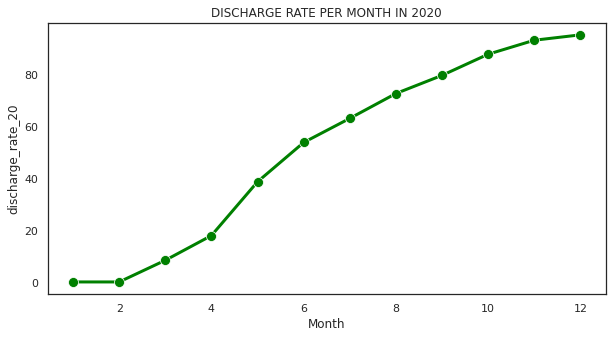

In [94]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_20",data=data_20,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2020')
plt.show()

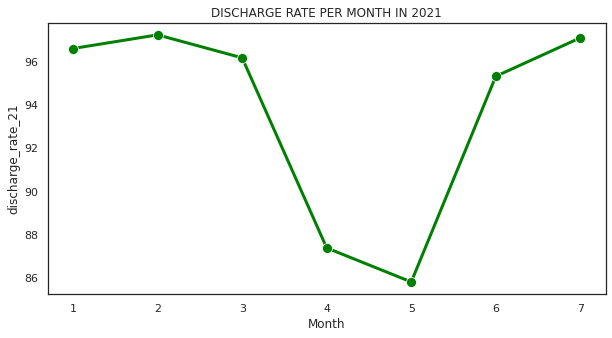

In [95]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_21",data=data_21,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2021')
plt.show()

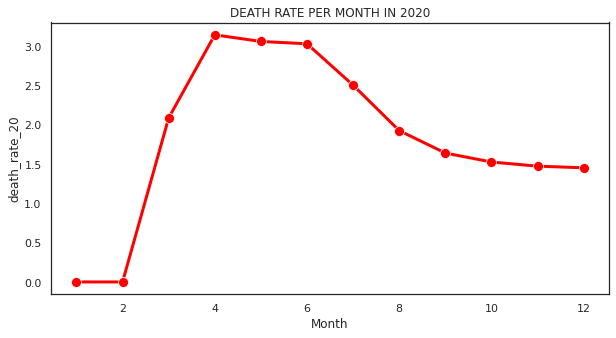

In [96]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_20",data=data_20,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2020')
plt.show()

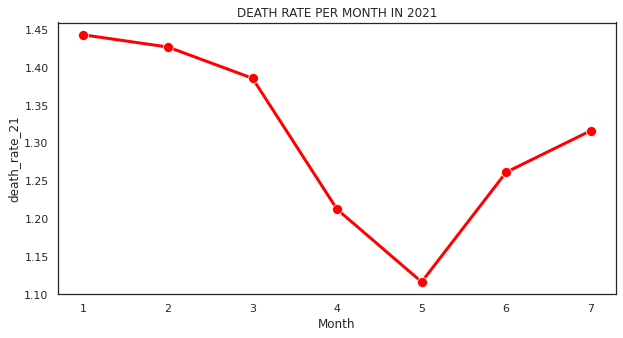

In [97]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_21",data=data_21,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2021')
plt.show()

In [98]:
tn=df[df['States']=='Tamil Nadu']['Cured']
mh=df[df['States']=='Maharashtra']['Cured']
kl=df[df['States']=='Kerala']['Cured']

In [ ]:
df.head()

In [99]:
print('Total number of Active Covid-19 cases across India : {}'.format(max_confirmed_cases['Active_cases'].sum()))
top_cases = max_confirmed_cases.groupby('States')['Active_cases'].max().sort_values(ascending=False).to_frame()
top_cases.style.background_gradient(cmap='flare')

Total number of Active Covid-19 cases across India : 459920


,Active_cases
States,
Maharashtra,117536
Kerala,104577
Karnataka,40039
Tamil Nadu,34477
Andhra Pradesh,33230
Odisha,25525
Assam,24244
West Bengal,17275
Telangana,11455


In [100]:
from fbprophet import Prophet
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
recovered = df.groupby('Date').sum()['Cured'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [101]:
confirmed.columns = ['ds', 'y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [102]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)       #Making future prediction for next 7 days
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
522,2021-07-05
523,2021-07-06
524,2021-07-07
525,2021-07-08
526,2021-07-09
527,2021-07-10
528,2021-07-11
529,2021-07-12
530,2021-07-13
531,2021-07-14


In [103]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
527,2021-07-10,3.446080e+07,3.308525e+07,3.574448e+07
528,2021-07-11,3.467014e+07,3.323862e+07,3.603594e+07
529,2021-07-12,3.487697e+07,3.355406e+07,3.630115e+07
530,2021-07-13,3.507755e+07,3.365842e+07,3.647191e+07
531,2021-07-14,3.528433e+07,3.390596e+07,3.669781e+07


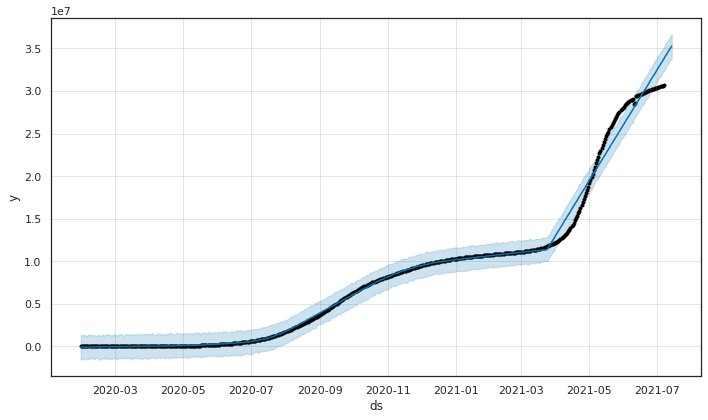

In [104]:
confirmed_forecast_plot = m.plot(forecast)

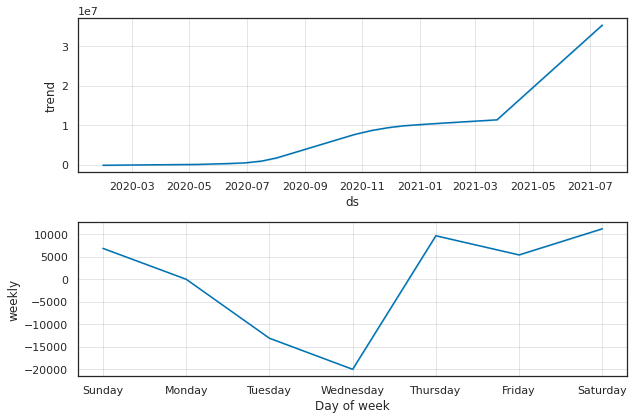

In [105]:
confirmed_forecast_plot = m.plot_components(forecast)

In [106]:
print('Average recovery rate Covid-19 cases across India : {}'.format(max_confirmed_cases['Discharge_Rate'].mean()))
top_cases = max_confirmed_cases.groupby('States')['Discharge_Rate'].max().sort_values(ascending=False).to_frame()
top_cases.style.background_gradient(cmap='flare')

Average recovery rate Covid-19 cases across India : 96.18701944444445


,Discharge_Rate
States,
Dadra and Nagar Haveli and Daman and Diu,99.593400
Rajasthan,98.955300
Madhya Pradesh,98.802100
Haryana,98.623200
Uttar Pradesh,98.553600
Chandigarh,98.518300
Gujarat,98.511500
Bihar,98.501100
Jharkhand,98.360600


In [107]:
discharge_rate = df[['Date','Discharge_Rate']]
discharge_rate.head()

,Date,Discharge_Rate
0,2020-01-30,0.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,0.0
4,2020-02-03,0.0


In [108]:
discharge_rate.columns = ['ds', 'y']
discharge_rate['ds'] = pd.to_datetime(discharge_rate['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
m = Prophet(interval_width=0.50)
m.fit(discharge_rate)
future = m.make_future_dataframe(periods=7)       #Making future prediction for next 7 days
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
522,2021-07-05
523,2021-07-06
524,2021-07-07
525,2021-07-08
526,2021-07-09
527,2021-07-10
528,2021-07-11
529,2021-07-12
530,2021-07-13
531,2021-07-14


In [110]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
527,2021-07-10,91.141552,81.424179,100.736178
528,2021-07-11,91.308179,82.528697,100.436224
529,2021-07-12,91.348836,81.125577,100.565753
530,2021-07-13,91.440982,81.877294,100.714753
531,2021-07-14,91.424371,81.934598,100.497992


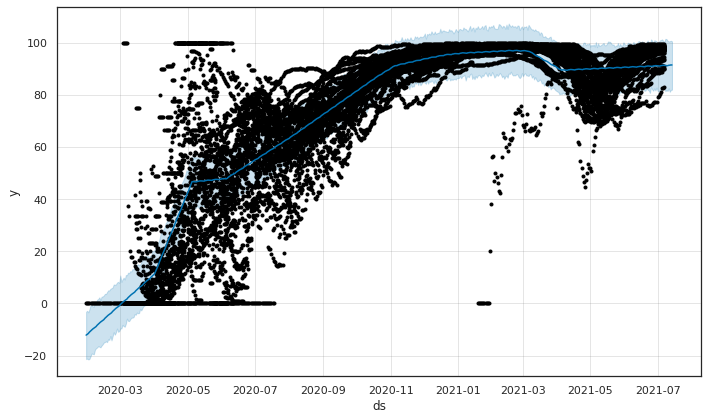

In [111]:
confirmed_forecast_plot = m.plot(forecast)

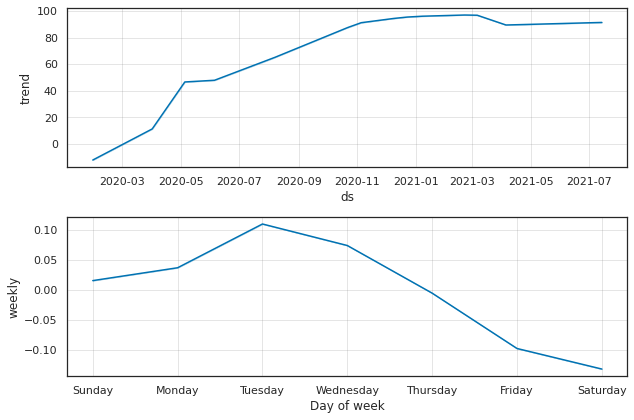

In [112]:
confirmed_forecast_plot = m.plot_components(forecast)

In [113]:
print('Average recovery rate Covid-19 cases across India : {}'.format(max_confirmed_cases['Discharge_Rate'].mean()))
top_cases = max_confirmed_cases.groupby('States')['Death_Rate'].max().sort_values(ascending=False).to_frame()
top_cases.style.background_gradient(cmap='flare')

Average recovery rate Covid-19 cases across India : 96.18701944444445


,Death_Rate
States,
Punjab,2.703200
Uttarakhand,2.152700
Maharashtra,2.020700
Nagaland,1.963400
Goa,1.834700
Delhi,1.742600
Himachal Pradesh,1.717200
Andaman and Nicobar Islands,1.709600
Meghalaya,1.680700


In [114]:
discharge_rate = df[['Date','Death_Rate']]
discharge_rate.head()

,Date,Death_Rate
0,2020-01-30,0.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,0.0
4,2020-02-03,0.0


In [115]:
discharge_rate.columns = ['ds', 'y']
discharge_rate['ds'] = pd.to_datetime(discharge_rate['ds'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
m = Prophet(interval_width=0.50)
m.fit(discharge_rate)
future = m.make_future_dataframe(periods=7)       #Making future prediction for next 7 days
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
522,2021-07-05
523,2021-07-06
524,2021-07-07
525,2021-07-08
526,2021-07-09
527,2021-07-10
528,2021-07-11
529,2021-07-12
530,2021-07-13
531,2021-07-14


In [117]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
527,2021-07-10,1.198428,0.084117,2.305048
528,2021-07-11,1.216801,0.113276,2.302672
529,2021-07-12,1.205736,0.221712,2.457721
530,2021-07-13,1.213109,0.160330,2.389933
531,2021-07-14,1.214582,0.090993,2.376284


In [118]:
df.head()

,Sno,Date,Time,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1,0.0,0.0
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1,0.0,0.0
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2,0.0,0.0
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3,0.0,0.0
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3,0.0,0.0


In [119]:
#Summarizing the analysis of all the states
#State-wise Report
state_cases = max_confirmed_cases.drop(['Sno','Date','ConfirmedIndianNational',
                                       'ConfirmedForeignNational'],axis=1)

state_wise_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active_cases"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death_Rate"])\
                        .background_gradient(cmap='Accent',subset=["Discharge_Rate"])

state_wise_cases

,Time,States,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
16834,8:00 AM,Maharashtra,5872268,123531,6113335,117536,96.056700,2.020700
16830,8:00 AM,Kerala,2877557,13960,2996094,104577,96.043600,0.465900
16829,8:00 AM,Karnataka,2784030,35526,2859595,40039,97.357500,1.242300
16844,8:00 AM,Tamil Nadu,2435872,33132,2503481,34477,97.299400,1.323400
16815,8:00 AM,Andhra Pradesh,1861937,12898,1908065,33230,97.582500,0.676000
16848,8:00 AM,Uttar Pradesh,1682130,22656,1706818,2032,98.553600,1.327400
16849,8:00 AM,West Bengal,1472132,17834,1507241,17275,97.670600,1.183200
16822,8:00 AM,Delhi,1408853,25001,1434687,833,98.199300,1.742600
16820,8:00 AM,Chhattisgarh,977893,13462,996359,5004,98.146700,1.351100
16842,8:00 AM,Rajasthan,942882,8942,952836,1012,98.955300,0.938500


In [120]:
uploaded = files.upload()
vaccine_df = pd.read_csv(io.BytesIO(uploaded['covid_vaccine_statewise.csv']))

Saving covid_vaccine_statewise.csv to covid_vaccine_statewise (1).csv


In [121]:
vacc_df=vaccine_df.copy()
vaccine_df = vaccine_df[['Updated On','State','Total Doses Administered','Total Sessions Conducted','First Dose Administered','Second Dose Administered','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)','Total Covaxin Administered','Total CoviShield Administered','Total Sputnik V Administered','18-45 years (Age)','45-60 years (Age)','60+ years (Age)','Total Individuals Vaccinated']]
vaccine_df.columns = ['Date','States','Total_Doses_Administered','Total_Sessions_Conducted','First_Dose_Administered','Second_Dose_Administered','Male_Vaccinated','Female_Vaccinated','Transgender_Vaccinated','Total_Covaxin_Administered','Total_CoviShield_Administered','Total_SputnikV_Administered','18-45_Years','45-60_Years','60+_Years','Total_Individuals_Vaccinated']
vaccine_df.head()

,Date,States,Total_Doses_Administered,Total_Sessions_Conducted,First_Dose_Administered,Second_Dose_Administered,Male_Vaccinated,Female_Vaccinated,Transgender_Vaccinated,Total_Covaxin_Administered,Total_CoviShield_Administered,Total_SputnikV_Administered,18-45_Years,45-60_Years,60+_Years,Total_Individuals_Vaccinated
0,16/01/2021,India,48276.0,3455.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,251280.0


In [122]:
#Checking the null values
vaccine_df.isnull().sum()

Date                                0
States                              0
Total_Doses_Administered          335
Total_Sessions_Conducted          336
First_Dose_Administered           336
Second_Dose_Administered          336
Male_Vaccinated                   336
Female_Vaccinated                 336
Transgender_Vaccinated            336
Total_Covaxin_Administered        336
Total_CoviShield_Administered     336
Total_SputnikV_Administered      4962
18-45_Years                      2522
45-60_Years                      2521
60+_Years                        2521
Total_Individuals_Vaccinated      336
dtype: int64

In [123]:
vaccine_df = vaccine_df[vaccine_df['Total_Individuals_Vaccinated'].notna()]

In [124]:
vaccine_df['Date'] = pd.to_datetime(vaccine_df['Date'], format = '%d/%m/%Y')
latest_date = max(vaccine_df['Date'])
print("Current Date : ", latest_date)

Current Date :  2021-07-06 00:00:00


In [125]:
vaccine_df[vaccine_df['States'] == "Dadra and Nagar Haveli and Daman and Diu"]

,Date,States,Total_Doses_Administered,Total_Sessions_Conducted,First_Dose_Administered,Second_Dose_Administered,Male_Vaccinated,Female_Vaccinated,Transgender_Vaccinated,Total_Covaxin_Administered,Total_CoviShield_Administered,Total_SputnikV_Administered,18-45_Years,45-60_Years,60+_Years,Total_Individuals_Vaccinated
1450,2021-01-16,Dadra and Nagar Haveli and Daman and Diu,23.0,4.0,23.0,0.0,13.0,10.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,23.0
1451,2021-01-17,Dadra and Nagar Haveli and Daman and Diu,23.0,4.0,23.0,0.0,13.0,10.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,23.0
1452,2021-01-18,Dadra and Nagar Haveli and Daman and Diu,15.0,6.0,15.0,0.0,9.0,6.0,0.0,0.0,15.0,NaN,NaN,NaN,NaN,15.0
1453,2021-01-19,Dadra and Nagar Haveli and Daman and Diu,31.0,6.0,31.0,0.0,15.0,16.0,0.0,0.0,31.0,NaN,NaN,NaN,NaN,31.0
1454,2021-01-20,Dadra and Nagar Haveli and Daman and Diu,31.0,8.0,31.0,0.0,15.0,16.0,0.0,0.0,31.0,NaN,NaN,NaN,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,2021-07-02,Dadra and Nagar Haveli and Daman and Diu,452556.0,48502.0,407860.0,44696.0,299862.0,152594.0,100.0,12.0,452544.0,0.0,318307.0,97928.0,36321.0,407860.0
1618,2021-07-03,Dadra and Nagar Haveli and Daman and Diu,466349.0,52897.0,418716.0,47633.0,309600.0,156646.0,103.0,12.0,466337.0,0.0,328062.0,101390.0,36897.0,418716.0
1619,2021-07-04,Dadra and Nagar Haveli and Daman and Diu,470444.0,42737.0,422031.0,48413.0,312401.0,157939.0,104.0,12.0,470432.0,0.0,330921.0,102415.0,37108.0,422031.0
1620,2021-07-05,Dadra and Nagar Haveli and Daman and Diu,480984.0,47156.0,430117.0,50867.0,319716.0,161162.0,106.0,12.0,480972.0,0.0,338177.0,105079.0,37728.0,430117.0


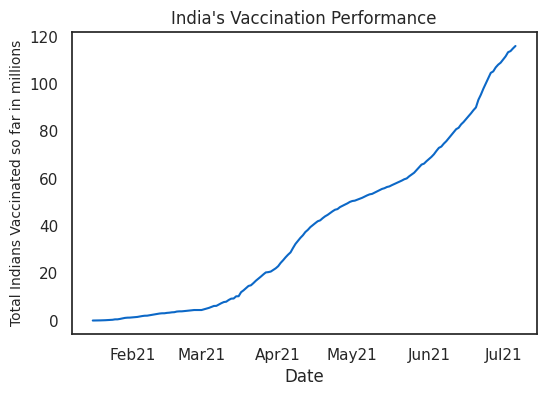

In [126]:
fig, ax = plt.subplots(ncols=1, nrows=1, dpi=100, figsize=(6,4))

sns.lineplot(data=vaccine_df[vaccine_df['States']=='India'], x='Date', y='Total_Individuals_Vaccinated', ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%b%y'))
ax.set_ylabel('Total Indians Vaccinated so far in millions', fontsize=10)
ax.set_yticklabels([0,0,20,40,60,80,100,120])

Xstart, Xend = ax.get_xlim()
plt.title('India\'s Vaccination Performance')
plt.show()